In [3]:
import os
import pandas as pd
import time
import numpy as np
from matplotlib import pyplot as plt
import itertools
import numpy as np
from scipy import stats
import pylab as pl
from sklearn import svm, linear_model
from sklearn.model_selection import cross_validate
from collections import OrderedDict
from scipy import linalg
from sklearn.preprocessing import StandardScaler
import pickle

In [44]:
import time
from sklearn.manifold import TSNE
from ggplot import ggplot
from ggplot import aes
from ggplot import *

D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [45]:
pickle_path="D:\\Courses\\InfoStorage\\Project\\Data\\FE"
item_stats= pd.read_pickle(pickle_path+"\\FeaturePickle\\product_stats.pkl")
queries_input= pd.read_pickle(pickle_path+"\\FeaturePickle\\queries_input.pkl")
query_item = pd.read_pickle(pickle_path+"\\FeaturePickle\\query_item.pkl")

In [46]:
item_stats.fillna(value=0, inplace=True)
X = pd.merge(query_item,item_stats,on='itemId',how='left')
X.head()

,queryId,itemId,vector_gensim_query,Relevance,is.test,item_show_count,Item_clicks,Item_view_count,Item_purchase_count,userShow,userView,userPurchase,CTR,View Rate,Click Value Rate,vector_gensim_product
0,1,7518,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,148.0,70.0,57.0,0.0,47.0,3.0,1.0,0.472973,0.385135,0.000000,"[0.009888342, 0.006329806, 0.0005410195, -0.00..."
1,1,71,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,192.0,92.0,73.0,2.0,102.0,2.0,1.0,0.479167,0.380208,0.010417,"[-0.0083958395, -0.0075500184, 0.0025241065, 0..."
2,1,30311,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,108.0,164.0,116.0,2.0,37.0,2.0,1.0,1.518519,1.074074,0.018519,"[0.007938938, 0.005018753, 0.0023497294, 0.001..."
3,1,7837,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,281.0,220.0,191.0,3.0,82.0,5.0,1.0,0.782918,0.679715,0.010676,"[-0.0075791064, -0.005229415, 0.008466356, -0...."
4,1,30792,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,389.0,475.0,445.0,11.0,143.0,11.0,1.0,1.221080,1.143959,0.028278,"[-0.0057816627, 0.009380997, 0.00030535308, -0..."


In [47]:
X = X.drop([ 'vector_gensim_query', 'vector_gensim_product'],axis=1)
X.head()

,queryId,itemId,Relevance,is.test,item_show_count,Item_clicks,Item_view_count,Item_purchase_count,userShow,userView,userPurchase,CTR,View Rate,Click Value Rate
0,1,7518,0,False,148.0,70.0,57.0,0.0,47.0,3.0,1.0,0.472973,0.385135,0.000000
1,1,71,0,False,192.0,92.0,73.0,2.0,102.0,2.0,1.0,0.479167,0.380208,0.010417
2,1,30311,0,False,108.0,164.0,116.0,2.0,37.0,2.0,1.0,1.518519,1.074074,0.018519
3,1,7837,0,False,281.0,220.0,191.0,3.0,82.0,5.0,1.0,0.782918,0.679715,0.010676
4,1,30792,0,False,389.0,475.0,445.0,11.0,143.0,11.0,1.0,1.221080,1.143959,0.028278


In [48]:
X = X.drop([ 'queryId', 'itemId','Relevance','is.test'],axis=1)
X.head()

,item_show_count,Item_clicks,Item_view_count,Item_purchase_count,userShow,userView,userPurchase,CTR,View Rate,Click Value Rate
0,148.0,70.0,57.0,0.0,47.0,3.0,1.0,0.472973,0.385135,0.000000
1,192.0,92.0,73.0,2.0,102.0,2.0,1.0,0.479167,0.380208,0.010417
2,108.0,164.0,116.0,2.0,37.0,2.0,1.0,1.518519,1.074074,0.018519
3,281.0,220.0,191.0,3.0,82.0,5.0,1.0,0.782918,0.679715,0.010676
4,389.0,475.0,445.0,11.0,143.0,11.0,1.0,1.221080,1.143959,0.028278


In [50]:
X.reset_index(drop=True)
X.head()

,item_show_count,Item_clicks,Item_view_count,Item_purchase_count,userShow,userView,userPurchase,CTR,View Rate,Click Value Rate
0,148.0,70.0,57.0,0.0,47.0,3.0,1.0,0.472973,0.385135,0.000000
1,192.0,92.0,73.0,2.0,102.0,2.0,1.0,0.479167,0.380208,0.010417
2,108.0,164.0,116.0,2.0,37.0,2.0,1.0,1.518519,1.074074,0.018519
3,281.0,220.0,191.0,3.0,82.0,5.0,1.0,0.782918,0.679715,0.010676
4,389.0,475.0,445.0,11.0,143.0,11.0,1.0,1.221080,1.143959,0.028278


In [51]:
train_numpy = X.values
train_numpy.shape

(1017762, 10)

In [53]:
train_numpy_subset = train_numpy[:38000]
len(train_numpy_subset)

38000

In [54]:
tsne = TSNE(n_components=2, verbose=2, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(train_numpy_subset)
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne.head()


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 38000 samples in 0.037s...
[t-SNE] Computed neighbors for 38000 samples in 1.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38000
[t-SNE] Computed conditional probabilities for sample 2000 / 38000
[t-SNE] Computed conditional probabilities for sample 3000 / 38000
[t-SNE] Computed conditional probabilities for sample 4000 / 38000
[t-SNE] Computed conditional probabilities for sample 5000 / 38000
[t-SNE] Computed conditional probabilities for sample 6000 / 38000
[t-SNE] Computed conditional probabilities for sample 7000 / 38000
[t-SNE] Computed conditional probabilities for sample 8000 / 38000
[t-SNE] Computed conditional probabilities for sample 9000 / 38000
[t-SNE] Computed conditional probabilities for sample 10000 / 38000
[t-SNE] Computed conditional probabilities for sample 11000 / 38000
[t-SNE] Computed conditional probabilities for sample 12000 / 38000
[t-SNE] Computed conditional probabilities for sam

Exception: Invalid column: 'red'
did you mean one of the following:


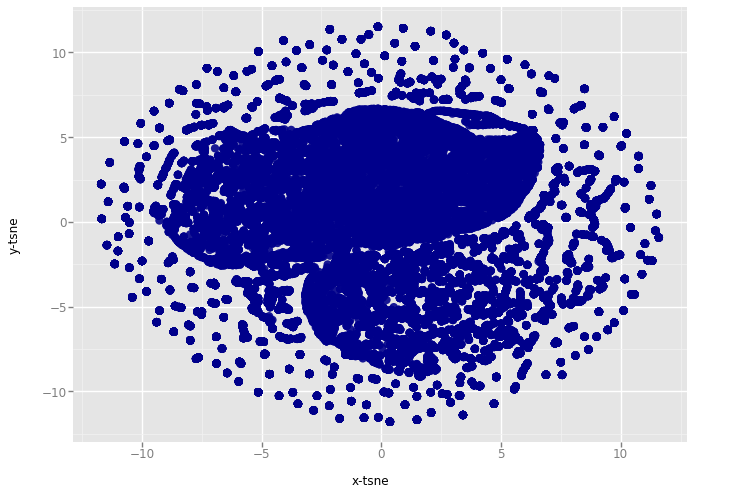

<ggplot: (121747574827)>

In [56]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(color='darkblue',size=70,alpha=0.9) 
chart

In [4]:
pickle_path="D:\\Courses\\InfoStorage\\Project\\Data\\FE"
with open(pickle_path+"\\productgraphedges.txt", "rb") as fp:  
    b = pickle.load(fp)

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
b

[(7518, 71),
 (7518, 30311),
 (7518, 7837),
 (7518, 30792),
 (7518, 8252),
 (7518, 81766),
 (7518, 9338),
 (7518, 62220),
 (7518, 52393),
 (7518, 2712),
 (7518, 32902),
 (7518, 33969),
 (7518, 66828),
 (7518, 4615),
 (7518, 4751),
 (7518, 12352),
 (7518, 78214),
 (7518, 24857),
 (7518, 13682),
 (71, 30311),
 (71, 7837),
 (71, 30792),
 (71, 8252),
 (71, 81766),
 (71, 9338),
 (71, 62220),
 (71, 52393),
 (71, 2712),
 (71, 32902),
 (71, 33969),
 (71, 66828),
 (71, 4615),
 (71, 4751),
 (71, 12352),
 (71, 78214),
 (71, 24857),
 (71, 13682),
 (30311, 7837),
 (30311, 30792),
 (30311, 8252),
 (30311, 81766),
 (30311, 9338),
 (30311, 62220),
 (30311, 52393),
 (30311, 2712),
 (30311, 32902),
 (30311, 33969),
 (30311, 66828),
 (30311, 4615),
 (30311, 4751),
 (30311, 12352),
 (30311, 78214),
 (30311, 24857),
 (30311, 13682),
 (7837, 30792),
 (7837, 8252),
 (7837, 81766),
 (7837, 9338),
 (7837, 62220),
 (7837, 52393),
 (7837, 2712),
 (7837, 32902),
 (7837, 33969),
 (7837, 66828),
 (7837, 4615),
 (78

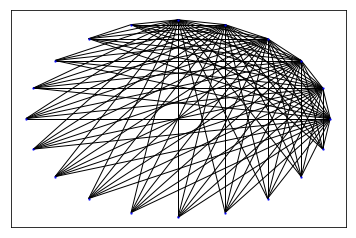

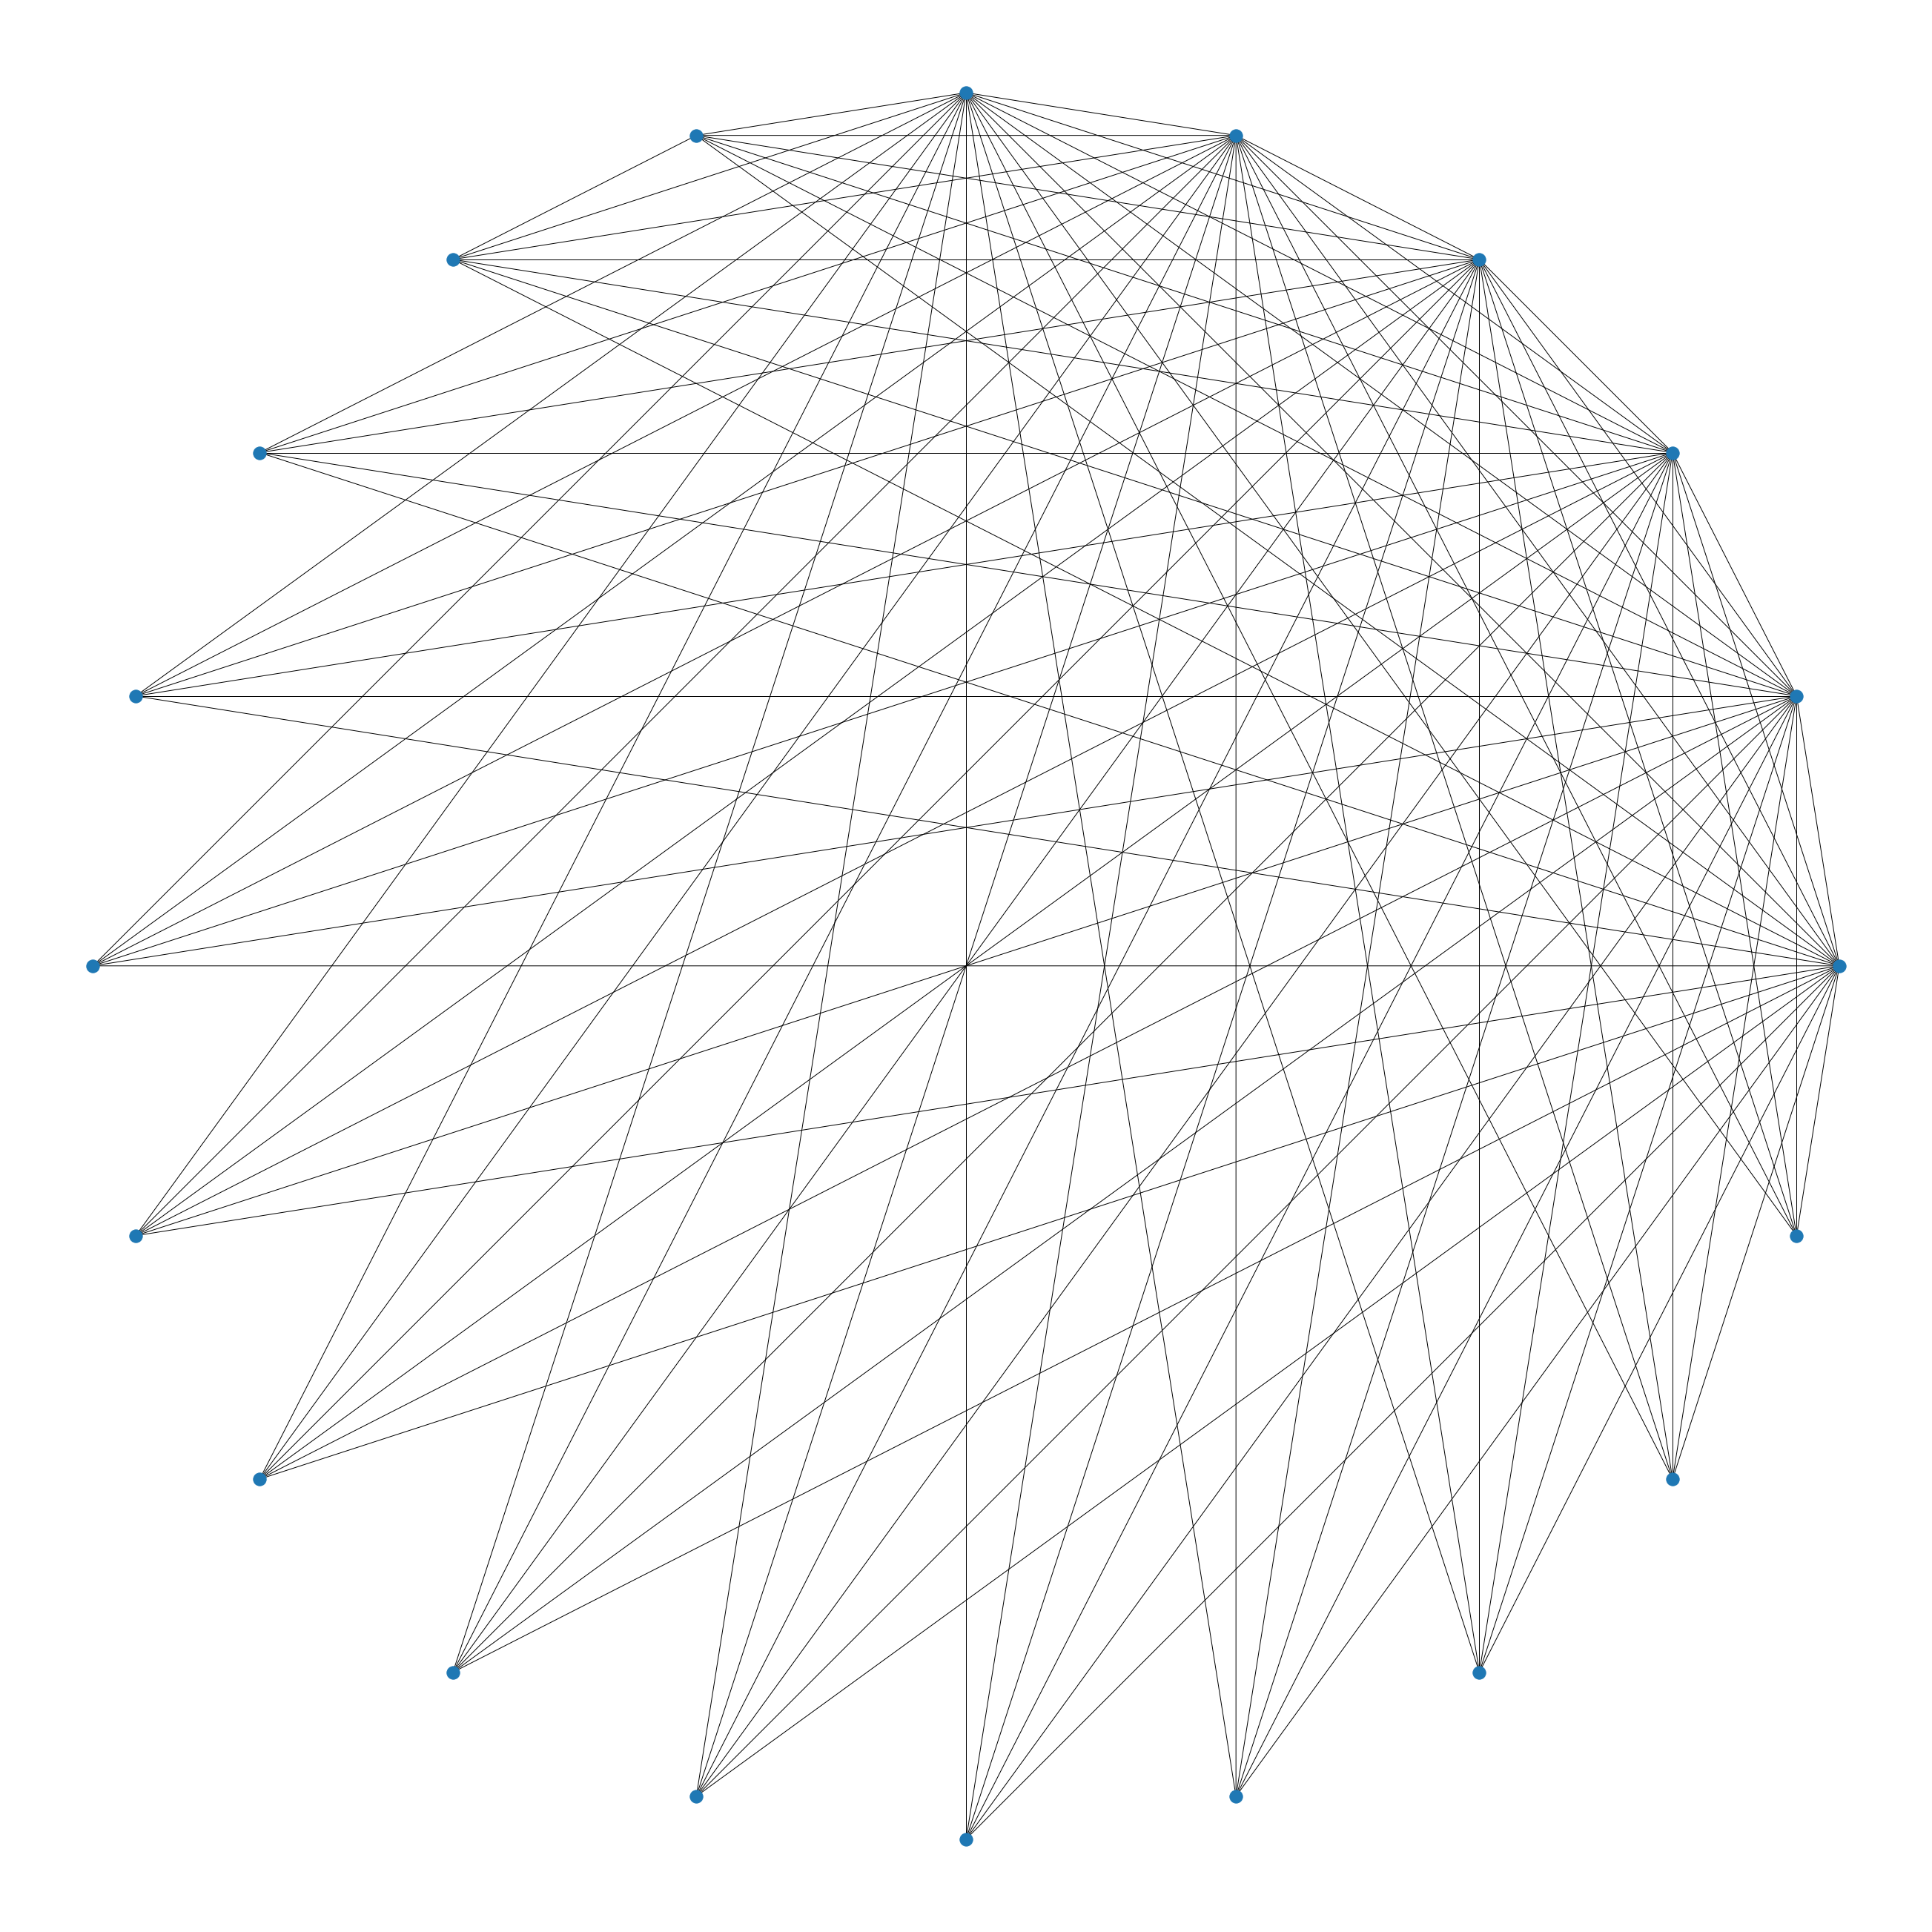

In [43]:
def draw_graph(graph):
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # There are graph layouts like shell, spring, spectral and random.
    # Shell layout usually looks better, so we're choosing it.
    # I will show some examples later of other layouts
    graph_pos = nx.shell_layout(G,scale=10)

    # draw nodes, edges and labels
    nx.draw_networkx_nodes(G, graph_pos, node_size=2, node_color='blue', alpha=0.7)
    nx.draw_networkx_edges(G, graph_pos)
    #nx.draw_networkx_labels(G, graph_pos, font_size=1, font_family='sans-serif')
    plt.figure(figsize=(36,36)) 
    nx.draw(G,graph_pos)
    plt.show()

# draw example
# graph is a list of tuples of nodes. Each tuple defining the
# connection between 2 nodes

draw_graph(b[:100])

In [2]:
pickle_path="D:\\Courses\\InfoStorage\\Project\\Data\\FE"
item_stats= pd.read_pickle(pickle_path+"\\FeaturePickle\\product_stats.pkl")
queries_input= pd.read_pickle(pickle_path+"\\FeaturePickle\\queries_input.pkl")
query_item = pd.read_pickle(pickle_path+"\\FeaturePickle\\query_item.pkl")
item_graphEmbedding10 = pd.read_pickle(pickle_path+"\\item_GraphEmbeddings10.pkl")
item_graphEmbedding100 = pd.read_pickle(pickle_path+"\\item_GraphEmbeddings100.pkl")
vector_gensimProduct6 = pd.read_pickle(pickle_path+"\\Vector_gensim_product_6.pkl")
vector_gensimProduct8 = pd.read_pickle(pickle_path+"\\Vector_gensim_product_8.pkl")
vector_gensimQuery6 = pd.read_pickle(pickle_path+"\\Vector_gensim_query_6.pkl")
vector_gensimQuery8 = pd.read_pickle(pickle_path+"\\Vector_gensim_query_8.pkl")

In [3]:
item_graphEmbedding32 = pd.read_pickle(pickle_path+"\\item_GraphEmbeddings32nodesiter100.pkl")

In [10]:
item_graphEmbedding32.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,itemId
0,0.503943,-0.309028,-0.260884,0.609876,0.462921,-0.412806,0.743063,-0.160069,0.175842,0.596921,...,-0.526666,0.588130,-0.766030,0.248373,0.533891,0.540430,0.484925,-0.084654,0.223046,2
1,0.397293,-0.263114,-0.204032,0.495434,0.418805,-0.334624,0.611841,-0.168223,0.135930,0.510749,...,-0.440542,0.509094,-0.654715,0.180193,0.459509,0.467686,0.391149,-0.059294,0.187023,6
2,0.615435,-0.333361,-0.368369,0.712776,0.461256,-0.510349,0.893717,-0.104165,0.248677,0.664598,...,-0.605681,0.652772,-0.832825,0.346550,0.603410,0.583324,0.575976,-0.137032,0.246914,7
3,0.525810,-0.322176,-0.236230,0.633185,0.480081,-0.397903,0.741950,-0.178267,0.164585,0.600035,...,-0.525922,0.591815,-0.806591,0.256684,0.544552,0.573377,0.509925,-0.065835,0.230516,9
4,0.303068,-0.189779,-0.121221,0.355122,0.288854,-0.207997,0.410682,-0.114744,0.084493,0.324160,...,-0.285151,0.326859,-0.476306,0.142475,0.310663,0.352963,0.301529,-0.016490,0.129927,10


In [19]:
item_stats.fillna(value=0, inplace=True)
X = pd.merge(query_item,item_stats,on='itemId',how='left')
X.head()

,queryId,itemId,vector_gensim_query,Relevance,is.test,item_show_count,Item_clicks,Item_view_count,Item_purchase_count,userShow,userView,userPurchase,CTR,View Rate,Click Value Rate,vector_gensim_product
0,1,7518,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,148.0,70.0,57.0,0.0,47.0,3.0,1.0,0.472973,0.385135,0.000000,"[0.009888342, 0.006329806, 0.0005410195, -0.00..."
1,1,71,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,192.0,92.0,73.0,2.0,102.0,2.0,1.0,0.479167,0.380208,0.010417,"[-0.0083958395, -0.0075500184, 0.0025241065, 0..."
2,1,30311,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,108.0,164.0,116.0,2.0,37.0,2.0,1.0,1.518519,1.074074,0.018519,"[0.007938938, 0.005018753, 0.0023497294, 0.001..."
3,1,7837,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,281.0,220.0,191.0,3.0,82.0,5.0,1.0,0.782918,0.679715,0.010676,"[-0.0075791064, -0.005229415, 0.008466356, -0...."
4,1,30792,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,389.0,475.0,445.0,11.0,143.0,11.0,1.0,1.221080,1.143959,0.028278,"[-0.0057816627, 0.009380997, 0.00030535308, -0..."


In [20]:
item_graphEmbedding32.head()
c=[]
for i in range(0,32):
    c.append("graphfeature"+str(i))
c.append("itemId")
item_graphEmbedding32.columns=c
item_graphEmbedding32.head()
#path_to_save="D:\\Courses\\InfoStorage\\Project\\Data\\Numpy_Objects\\GraphFeatures100WithWordEmbeddingsALL\\"
#basicfeatures_cosine= pd.read_pickle(path_to_save+"basicfeatures_cosine.pkl")
#basicfeatures_cosine.head()
X = X.drop([ \
           'item_show_count','Item_clicks','Item_view_count','Item_purchase_count','userShow','userView',\
            'userPurchase','CTR','View Rate','Click Value Rate'],axis=1)
X.head()
#basicfeatures_cosine = basicfeatures_cosine.drop([ \
#           'item_show_count','Item_clicks','Item_view_count','Item_purchase_count','userShow','userView',\
#            'userPurchase','CTR','View Rate','Click Value Rate','Relevance','is.test'],axis=1)
#basicfeatures_cosine.head()
#X = pd.merge(X,basicfeatures_cosine,on=['queryId','itemId'],how='left')
X = pd.merge(X,item_graphEmbedding32,on='itemId',how='left')
X.head()

,queryId,itemId,vector_gensim_query,Relevance,is.test,vector_gensim_product,graphfeature0,graphfeature1,graphfeature2,graphfeature3,...,graphfeature22,graphfeature23,graphfeature24,graphfeature25,graphfeature26,graphfeature27,graphfeature28,graphfeature29,graphfeature30,graphfeature31
0,1,7518,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,"[0.009888342, 0.006329806, 0.0005410195, -0.00...",0.123289,0.090702,-0.417319,0.139972,...,0.106274,-0.205896,0.072958,0.173016,0.270135,0.007611,-0.269865,0.032990,-0.277112,-0.008059
1,1,71,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,"[-0.0083958395, -0.0075500184, 0.0025241065, 0...",0.604630,-0.204905,-0.664651,0.641725,...,0.489047,-0.605079,0.552969,-0.529217,0.495783,0.475943,0.300288,0.456728,-0.278989,0.147864
2,1,30311,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,"[0.007938938, 0.005018753, 0.0023497294, 0.001...",0.052190,0.101936,-0.313290,0.070542,...,0.053253,-0.131966,0.019674,0.204108,0.196251,-0.035093,-0.272913,-0.005762,-0.226301,-0.018853
3,1,7837,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,"[-0.0075791064, -0.005229415, 0.008466356, -0....",0.214067,0.344720,-1.127360,0.275168,...,0.208607,-0.489013,0.092956,0.686738,0.710870,-0.099607,-0.936107,-0.001273,-0.802334,-0.059817
4,1,30792,"[-0.006535598, 0.0024064586, 0.0074732024, -0....",0,False,"[-0.0057816627, 0.009380997, 0.00030535308, -0...",0.236757,0.519712,-1.544539,0.328175,...,0.249131,-0.638043,0.078131,1.044327,0.965805,-0.193153,-1.381318,-0.043841,-1.124789,-0.100198


In [21]:
Train = X[X['is.test']==False]
Test = X[X['is.test']== True]
Train= Train.drop(['is.test'], axis=1)
Test= Test.drop(['is.test'], axis=1)

In [22]:
Train.reset_index(drop=True)
Test.reset_index(drop=True)

,queryId,itemId,vector_gensim_query,Relevance,vector_gensim_product,graphfeature0,graphfeature1,graphfeature2,graphfeature3,graphfeature4,...,graphfeature22,graphfeature23,graphfeature24,graphfeature25,graphfeature26,graphfeature27,graphfeature28,graphfeature29,graphfeature30,graphfeature31
0,3,59081,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[-0.0056795957, 0.0066146906, -0.0044425414, 0...",0.130055,0.356588,-1.002406,0.190810,-0.833411,...,0.145973,-0.399601,0.029349,0.721459,0.623725,-0.148663,-0.936461,-0.046780,-0.740324,-0.072952
1,3,51125,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[-0.0039685355, 0.003466247, -0.0091299005, 0....",0.610672,1.329502,-3.963084,0.829350,-3.152418,...,0.637509,-1.627378,0.193593,2.676101,2.484539,-0.490879,-3.533074,-0.114459,-2.878572,-0.262248
2,3,9338,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.0093724625, -0.0019690525, -0.007802633, 0....",0.958695,1.719256,-5.431369,1.237841,-4.139887,...,0.952905,-2.297200,0.369755,3.445554,3.424871,-0.549174,-4.628045,-0.066220,-3.889912,-0.320953
3,3,9550,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.0037035453, -0.003637445, -0.0018692636, -0...",0.191957,0.425538,-1.262204,0.263258,-1.007424,...,0.201481,-0.517786,0.059959,0.857177,0.789397,-0.159844,-1.129846,-0.039247,-0.918018,-0.083978
4,3,32087,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[-0.0007508087, 0.0017219065, 0.0040693423, -0...",0.028758,0.106479,-0.281093,0.046224,-0.245011,...,0.035592,-0.107188,0.000923,0.216710,0.173775,-0.049649,-0.275904,-0.019365,-0.210701,-0.023275
5,3,62793,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.0052768565, -0.00851828, 0.0025245228, 0.00...",0.122607,0.368432,-1.014475,0.182368,-0.856487,...,0.140845,-0.397034,0.019432,0.747615,0.630454,-0.159972,-0.962643,-0.055652,-0.751751,-0.078218
6,3,2717,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[-0.0019545446, 0.00501514, -0.00999136, 0.006...",0.941299,1.119364,-4.109897,1.097480,-2.810932,...,0.852363,-1.840614,0.448190,2.218849,2.631600,-0.201152,-3.120044,0.099698,-2.835539,-0.184574
7,3,10403,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.0042944374, 0.009210457, 0.006753577, 0.004...",0.075597,0.200227,-0.567803,0.106908,-0.468751,...,0.082952,-0.225254,0.016102,0.406074,0.354080,-0.082699,-0.526194,-0.026705,-0.417160,-0.042002
8,3,32902,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.002672738, 0.003559209, 0.0042537283, -0.00...",1.035924,2.367331,-6.962749,1.432639,-5.595540,...,1.099116,-2.845105,0.313748,4.768131,4.358775,-0.898258,-6.274799,-0.224302,-5.078561,-0.468838
9,3,22900,"[-0.00045727068, -0.00245887, -0.009570002, 0....",0,"[0.00857217, -0.0028588756, 0.0079965005, -0.0...",0.692201,1.301878,-4.049555,0.905032,-3.121781,...,0.695816,-1.700781,0.256338,2.609258,2.551855,-0.432115,-3.492506,-0.064468,-2.910758,-0.246600


In [33]:
test=[]
query_item_order_test=[]
labels_test=[]
for index,row in Test.iterrows():
    r=[]
    query_item_order_test.append([row['queryId'],row['itemId']])
    
    r.append(row['graphfeature0'])
    r.append(row['graphfeature1'])
    r.append(row['graphfeature2'])
    r.append(row['graphfeature3'])
    r.append(row['graphfeature4'])
    r.append(row['graphfeature5'])
    r.append(row['graphfeature6'])
    r.append(row['graphfeature7'])
    r.append(row['graphfeature8'])
    r.append(row['graphfeature9'])
    r.append(row['graphfeature10'])
    r.append(row['graphfeature11'])
    r.append(row['graphfeature12'])
    r.append(row['graphfeature13'])
    r.append(row['graphfeature14'])
    r.append(row['graphfeature15'])
    r.append(row['graphfeature16'])
    r.append(row['graphfeature17'])
    r.append(row['graphfeature18'])
    r.append(row['graphfeature19'])
    r.append(row['graphfeature20'])
    r.append(row['graphfeature21'])
    r.append(row['graphfeature22'])
    r.append(row['graphfeature23'])
    r.append(row['graphfeature24'])
    r.append(row['graphfeature25'])
    r.append(row['graphfeature26'])
    r.append(row['graphfeature27'])
    r.append(row['graphfeature28'])
    r.append(row['graphfeature29'])
    r.append(row['graphfeature30'])
    r.append(row['graphfeature31'])
    d1= row['vector_gensim_query'].tolist()
    r= r + d1
    d2= row['vector_gensim_product'].tolist()
    r= r + d2
    
    test.append(r)
    labels_test.append(row['Relevance'])

In [34]:
train=[]
query_item_order=[]
labels=[]
for index,row in Train.iterrows():
    r=[]
    query_item_order.append([row['queryId'],row['itemId']])
    
    r.append(row['graphfeature0'])
    r.append(row['graphfeature1'])
    r.append(row['graphfeature2'])
    r.append(row['graphfeature3'])
    r.append(row['graphfeature4'])
    r.append(row['graphfeature5'])
    r.append(row['graphfeature6'])
    r.append(row['graphfeature7'])
    r.append(row['graphfeature8'])
    r.append(row['graphfeature9'])
    r.append(row['graphfeature10'])
    r.append(row['graphfeature11'])
    r.append(row['graphfeature12'])
    r.append(row['graphfeature13'])
    r.append(row['graphfeature14'])
    r.append(row['graphfeature15'])
    r.append(row['graphfeature16'])
    r.append(row['graphfeature17'])
    r.append(row['graphfeature18'])
    r.append(row['graphfeature19'])
    r.append(row['graphfeature20'])
    r.append(row['graphfeature21'])
    r.append(row['graphfeature22'])
    r.append(row['graphfeature23'])
    r.append(row['graphfeature24'])
    r.append(row['graphfeature25'])
    r.append(row['graphfeature26'])
    r.append(row['graphfeature27'])
    r.append(row['graphfeature28'])
    r.append(row['graphfeature29'])
    r.append(row['graphfeature30'])
    r.append(row['graphfeature31'])
    d1= row['vector_gensim_query'].tolist()
    r= r + d1
    d2= row['vector_gensim_product'].tolist()
    r= r + d2
    
    train.append(r)
    labels.append(row['Relevance'])

In [35]:
train = np.array(train)
test= np.array(test)
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)
L=Train['queryId'].value_counts(sort=True, ascending=True)
L = dict(L)
L= OrderedDict(sorted(L.items()))
print(len(L))
print(len(labels))

35615
703519


In [36]:
train.shape

(703519, 132)

In [37]:
#http://fa.bianp.net/blog/2012/learning-to-rank-with-scikit-learn-the-pairwise-transform/
k = 0
Xp, yp, diff = [], [], []
s=0
e=0
theta = np.deg2rad(60)
w = np.array([np.sin(theta), np.cos(theta)]) #for plotting
for key in L:
    comb = itertools.combinations(range(L.get(key)), 2)
    #create the first batch
    s=e
    e=s+L.get(key) -1
    #print("Start:%d, End %d" %(s,e))
    for (i, j) in comb:
        i=i+s
        j=j+e-1
        if labels[i] == labels[j] or query_item_order[i][0] != query_item_order[j][0] :
            # skip if same target or different group(different qIds)
            continue
        Xp.append(train[i] - train[j])
        diff.append(labels[i] - labels[j])
        yp.append(np.sign(diff[-1]))
        # output balanced classes
        if yp[-1] != (-1) ** k:
            yp[-1] *= -1
            Xp[-1] *= -1
            diff[-1] *= -1
        k += 1
Xp, yp, diff = map(np.asanyarray, (Xp, yp, diff))

In [43]:
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(Xp, yp)
coef = clf.coef_.ravel() / linalg.norm(clf.coef_)

In [44]:
#perform the prediction 
pred= np.dot(test, coef)

In [45]:
# Process before Writing to a file
print(pred.shape)
print(len(pred))
od=Test['queryId'].value_counts(sort=True, ascending=True)
od = dict(od)
od= OrderedDict(sorted(od.items()))

(314243,)
314243


In [54]:
r_i={}
s=0
e=0
for key in od:
    s=e
    e= s+ od.get(key)
    print("Start:%d, End %d" %(s,e))
    subset= query_item_order_test[s:e]
    query_item_order=[]
    for item in subset:
        query_item_order.append(item[1])
    
    query_item_order= np.array(query_item_order)
    np.random.shuffle(query_item_order)
    r_i[key]= query_item_order.tolist()

Start:0, End 20
Start:20, End 40
Start:40, End 60
Start:60, End 80
Start:80, End 100
Start:100, End 110
Start:110, End 130
Start:130, End 150
Start:150, End 170
Start:170, End 184
Start:184, End 204
Start:204, End 224
Start:224, End 244
Start:244, End 264
Start:264, End 284
Start:284, End 304
Start:304, End 324
Start:324, End 344
Start:344, End 364
Start:364, End 384
Start:384, End 404
Start:404, End 424
Start:424, End 444
Start:444, End 464
Start:464, End 484
Start:484, End 504
Start:504, End 520
Start:520, End 540
Start:540, End 560
Start:560, End 582
Start:582, End 602
Start:602, End 622
Start:622, End 642
Start:642, End 662
Start:662, End 676
Start:676, End 696
Start:696, End 716
Start:716, End 736
Start:736, End 756
Start:756, End 776
Start:776, End 796
Start:796, End 811
Start:811, End 831
Start:831, End 845
Start:845, End 865
Start:865, End 885
Start:885, End 904
Start:904, End 923
Start:923, End 943
Start:943, End 963
Start:963, End 983
Start:983, End 1003
Start:1003, End 1023


Start:33812, End 33832
Start:33832, End 33852
Start:33852, End 33872
Start:33872, End 33892
Start:33892, End 33909
Start:33909, End 33929
Start:33929, End 33949
Start:33949, End 33971
Start:33971, End 33990
Start:33990, End 34010
Start:34010, End 34030
Start:34030, End 34050
Start:34050, End 34070
Start:34070, End 34090
Start:34090, End 34110
Start:34110, End 34122
Start:34122, End 34142
Start:34142, End 34162
Start:34162, End 34182
Start:34182, End 34198
Start:34198, End 34218
Start:34218, End 34238
Start:34238, End 34258
Start:34258, End 34278
Start:34278, End 34298
Start:34298, End 34318
Start:34318, End 34337
Start:34337, End 34357
Start:34357, End 34377
Start:34377, End 34396
Start:34396, End 34416
Start:34416, End 34436
Start:34436, End 34451
Start:34451, End 34471
Start:34471, End 34491
Start:34491, End 34511
Start:34511, End 34531
Start:34531, End 34551
Start:34551, End 34563
Start:34563, End 34583
Start:34583, End 34603
Start:34603, End 34622
Start:34622, End 34640
Start:34640

Start:62482, End 62502
Start:62502, End 62513
Start:62513, End 62533
Start:62533, End 62553
Start:62553, End 62573
Start:62573, End 62593
Start:62593, End 62613
Start:62613, End 62633
Start:62633, End 62653
Start:62653, End 62666
Start:62666, End 62682
Start:62682, End 62702
Start:62702, End 62713
Start:62713, End 62733
Start:62733, End 62752
Start:62752, End 62772
Start:62772, End 62792
Start:62792, End 62812
Start:62812, End 62832
Start:62832, End 62852
Start:62852, End 62872
Start:62872, End 62892
Start:62892, End 62913
Start:62913, End 62933
Start:62933, End 62953
Start:62953, End 62965
Start:62965, End 62985
Start:62985, End 63005
Start:63005, End 63024
Start:63024, End 63044
Start:63044, End 63064
Start:63064, End 63083
Start:63083, End 63103
Start:63103, End 63123
Start:63123, End 63143
Start:63143, End 63158
Start:63158, End 63178
Start:63178, End 63198
Start:63198, End 63216
Start:63216, End 63236
Start:63236, End 63246
Start:63246, End 63266
Start:63266, End 63285
Start:63285

Start:91194, End 91214
Start:91214, End 91234
Start:91234, End 91254
Start:91254, End 91274
Start:91274, End 91294
Start:91294, End 91314
Start:91314, End 91334
Start:91334, End 91354
Start:91354, End 91374
Start:91374, End 91394
Start:91394, End 91414
Start:91414, End 91434
Start:91434, End 91449
Start:91449, End 91470
Start:91470, End 91490
Start:91490, End 91510
Start:91510, End 91530
Start:91530, End 91550
Start:91550, End 91571
Start:91571, End 91596
Start:91596, End 91616
Start:91616, End 91636
Start:91636, End 91656
Start:91656, End 91676
Start:91676, End 91694
Start:91694, End 91714
Start:91714, End 91732
Start:91732, End 91752
Start:91752, End 91772
Start:91772, End 91792
Start:91792, End 91812
Start:91812, End 91832
Start:91832, End 91852
Start:91852, End 91872
Start:91872, End 91892
Start:91892, End 91912
Start:91912, End 91932
Start:91932, End 91952
Start:91952, End 91972
Start:91972, End 91992
Start:91992, End 92013
Start:92013, End 92033
Start:92033, End 92053
Start:92053

Start:119932, End 119952
Start:119952, End 119972
Start:119972, End 119992
Start:119992, End 120012
Start:120012, End 120032
Start:120032, End 120052
Start:120052, End 120072
Start:120072, End 120092
Start:120092, End 120112
Start:120112, End 120132
Start:120132, End 120152
Start:120152, End 120172
Start:120172, End 120192
Start:120192, End 120212
Start:120212, End 120232
Start:120232, End 120252
Start:120252, End 120272
Start:120272, End 120291
Start:120291, End 120311
Start:120311, End 120322
Start:120322, End 120342
Start:120342, End 120362
Start:120362, End 120382
Start:120382, End 120402
Start:120402, End 120422
Start:120422, End 120442
Start:120442, End 120462
Start:120462, End 120482
Start:120482, End 120502
Start:120502, End 120522
Start:120522, End 120542
Start:120542, End 120562
Start:120562, End 120582
Start:120582, End 120602
Start:120602, End 120622
Start:120622, End 120642
Start:120642, End 120662
Start:120662, End 120682
Start:120682, End 120702
Start:120702, End 120713


Start:148899, End 148919
Start:148919, End 148939
Start:148939, End 148959
Start:148959, End 148979
Start:148979, End 148999
Start:148999, End 149019
Start:149019, End 149039
Start:149039, End 149059
Start:149059, End 149079
Start:149079, End 149099
Start:149099, End 149119
Start:149119, End 149139
Start:149139, End 149159
Start:149159, End 149179
Start:149179, End 149193
Start:149193, End 149214
Start:149214, End 149234
Start:149234, End 149254
Start:149254, End 149274
Start:149274, End 149294
Start:149294, End 149314
Start:149314, End 149334
Start:149334, End 149354
Start:149354, End 149374
Start:149374, End 149394
Start:149394, End 149414
Start:149414, End 149434
Start:149434, End 149454
Start:149454, End 149474
Start:149474, End 149494
Start:149494, End 149514
Start:149514, End 149534
Start:149534, End 149554
Start:149554, End 149574
Start:149574, End 149594
Start:149594, End 149614
Start:149614, End 149634
Start:149634, End 149654
Start:149654, End 149674
Start:149674, End 149694


Start:177857, End 177877
Start:177877, End 177897
Start:177897, End 177917
Start:177917, End 177937
Start:177937, End 177957
Start:177957, End 177977
Start:177977, End 177997
Start:177997, End 178014
Start:178014, End 178034
Start:178034, End 178054
Start:178054, End 178074
Start:178074, End 178094
Start:178094, End 178114
Start:178114, End 178134
Start:178134, End 178153
Start:178153, End 178173
Start:178173, End 178193
Start:178193, End 178213
Start:178213, End 178233
Start:178233, End 178253
Start:178253, End 178274
Start:178274, End 178290
Start:178290, End 178310
Start:178310, End 178320
Start:178320, End 178335
Start:178335, End 178355
Start:178355, End 178375
Start:178375, End 178395
Start:178395, End 178415
Start:178415, End 178435
Start:178435, End 178455
Start:178455, End 178475
Start:178475, End 178495
Start:178495, End 178515
Start:178515, End 178535
Start:178535, End 178549
Start:178549, End 178569
Start:178569, End 178589
Start:178589, End 178609
Start:178609, End 178629


Start:207041, End 207061
Start:207061, End 207081
Start:207081, End 207098
Start:207098, End 207118
Start:207118, End 207138
Start:207138, End 207150
Start:207150, End 207170
Start:207170, End 207194
Start:207194, End 207214
Start:207214, End 207228
Start:207228, End 207248
Start:207248, End 207268
Start:207268, End 207288
Start:207288, End 207301
Start:207301, End 207321
Start:207321, End 207341
Start:207341, End 207360
Start:207360, End 207379
Start:207379, End 207399
Start:207399, End 207419
Start:207419, End 207439
Start:207439, End 207459
Start:207459, End 207479
Start:207479, End 207499
Start:207499, End 207519
Start:207519, End 207539
Start:207539, End 207559
Start:207559, End 207579
Start:207579, End 207593
Start:207593, End 207613
Start:207613, End 207633
Start:207633, End 207653
Start:207653, End 207673
Start:207673, End 207693
Start:207693, End 207705
Start:207705, End 207725
Start:207725, End 207746
Start:207746, End 207766
Start:207766, End 207786
Start:207786, End 207806


Start:245895, End 245913
Start:245913, End 245934
Start:245934, End 245954
Start:245954, End 245974
Start:245974, End 245994
Start:245994, End 246014
Start:246014, End 246034
Start:246034, End 246054
Start:246054, End 246074
Start:246074, End 246094
Start:246094, End 246114
Start:246114, End 246134
Start:246134, End 246154
Start:246154, End 246174
Start:246174, End 246196
Start:246196, End 246216
Start:246216, End 246236
Start:246236, End 246256
Start:246256, End 246276
Start:246276, End 246296
Start:246296, End 246316
Start:246316, End 246336
Start:246336, End 246356
Start:246356, End 246376
Start:246376, End 246392
Start:246392, End 246412
Start:246412, End 246432
Start:246432, End 246452
Start:246452, End 246472
Start:246472, End 246492
Start:246492, End 246512
Start:246512, End 246524
Start:246524, End 246544
Start:246544, End 246564
Start:246564, End 246584
Start:246584, End 246604
Start:246604, End 246624
Start:246624, End 246639
Start:246639, End 246666
Start:246666, End 246686


Start:283260, End 283282
Start:283282, End 283302
Start:283302, End 283322
Start:283322, End 283340
Start:283340, End 283360
Start:283360, End 283380
Start:283380, End 283400
Start:283400, End 283419
Start:283419, End 283439
Start:283439, End 283459
Start:283459, End 283479
Start:283479, End 283499
Start:283499, End 283519
Start:283519, End 283539
Start:283539, End 283559
Start:283559, End 283579
Start:283579, End 283599
Start:283599, End 283619
Start:283619, End 283639
Start:283639, End 283659
Start:283659, End 283679
Start:283679, End 283699
Start:283699, End 283719
Start:283719, End 283743
Start:283743, End 283763
Start:283763, End 283783
Start:283783, End 283803
Start:283803, End 283823
Start:283823, End 283843
Start:283843, End 283863
Start:283863, End 283882
Start:283882, End 283902
Start:283902, End 283921
Start:283921, End 283945
Start:283945, End 283965
Start:283965, End 283985
Start:283985, End 284005
Start:284005, End 284023
Start:284023, End 284043
Start:284043, End 284063


In [55]:
r_i

{3: [27893,
  51125,
  35366,
  22900,
  3476,
  10403,
  35879,
  36182,
  59081,
  32902,
  35914,
  376977,
  62793,
  9338,
  2717,
  34760,
  3227,
  32087,
  77294,
  9550],
 9: [9252,
  53009,
  75611,
  3962,
  10237,
  27771,
  915,
  125242,
  6074,
  4434,
  86030,
  23251,
  130558,
  17808,
  162436,
  3168,
  206383,
  18396,
  23542,
  46586],
 11: [6034,
  47310,
  133421,
  5351,
  4991,
  14085,
  57608,
  79243,
  79659,
  34668,
  79301,
  34738,
  6033,
  128749,
  13559,
  36706,
  36438,
  24387,
  6074,
  90454],
 16: [16053,
  200571,
  134518,
  100568,
  88162,
  45958,
  4434,
  25683,
  73759,
  66678,
  8707,
  164158,
  11236,
  72703,
  135797,
  88444,
  35990,
  159664,
  54434,
  29133],
 19: [3367,
  148030,
  7020,
  32902,
  40986,
  35097,
  79956,
  9338,
  1013,
  68520,
  43422,
  6542,
  46941,
  36885,
  35710,
  13064,
  11069,
  3687,
  7010,
  5384],
 21: [2507, 84856, 84517, 32708, 84875, 67634, 23656, 80102, 180115, 51930],
 23: [35625,


In [56]:
# Write to a file 
f= open("D:\\Courses\\InfoStorage\\Project\\Data\\submissions\\withRandomShuffling.txt","w")
for key in r_i:
    f.write("%s " % key)
    for index,item in enumerate(r_i.get(key)):
        ll=len(r_i.get(key))-1
        item= int(item)
        if index < ll:
            f.write("%s," % item)
        else:
            f.write("%s" % item)
    f.write("\n")
f.close()

In [46]:
#Calculate the Scores and Get the order

q_i={}

s=0
e=0
for key in od:
    s=e
    e=s+od.get(key)
    print("Start:%d, End %d" %(s,e))
    subset= query_item_order_test[s:e]
    query_item_order=[]
    query_item_score=[]
    for item in subset:
        query_item_order.append(item[1])
        query_item_score.append(pred[s])
        s=s+1
    temp=np.argsort(query_item_score)[::-1]
    temp=temp.tolist()
    query_item_order= np.array(query_item_order)
    query_item_order = query_item_order[temp]
    q_i[key]= query_item_order.tolist()

Start:0, End 20
Start:20, End 40
Start:40, End 60
Start:60, End 80
Start:80, End 100
Start:100, End 110
Start:110, End 130
Start:130, End 150
Start:150, End 170
Start:170, End 184
Start:184, End 204
Start:204, End 224
Start:224, End 244
Start:244, End 264
Start:264, End 284
Start:284, End 304
Start:304, End 324
Start:324, End 344
Start:344, End 364
Start:364, End 384
Start:384, End 404
Start:404, End 424
Start:424, End 444
Start:444, End 464
Start:464, End 484
Start:484, End 504
Start:504, End 520
Start:520, End 540
Start:540, End 560
Start:560, End 582
Start:582, End 602
Start:602, End 622
Start:622, End 642
Start:642, End 662
Start:662, End 676
Start:676, End 696
Start:696, End 716
Start:716, End 736
Start:736, End 756
Start:756, End 776
Start:776, End 796
Start:796, End 811
Start:811, End 831
Start:831, End 845
Start:845, End 865
Start:865, End 885
Start:885, End 904
Start:904, End 923
Start:923, End 943
Start:943, End 963
Start:963, End 983
Start:983, End 1003
Start:1003, End 1023


Start:26447, End 26467
Start:26467, End 26487
Start:26487, End 26507
Start:26507, End 26527
Start:26527, End 26547
Start:26547, End 26562
Start:26562, End 26582
Start:26582, End 26602
Start:26602, End 26622
Start:26622, End 26636
Start:26636, End 26656
Start:26656, End 26676
Start:26676, End 26696
Start:26696, End 26716
Start:26716, End 26731
Start:26731, End 26751
Start:26751, End 26771
Start:26771, End 26791
Start:26791, End 26811
Start:26811, End 26831
Start:26831, End 26851
Start:26851, End 26871
Start:26871, End 26884
Start:26884, End 26904
Start:26904, End 26918
Start:26918, End 26938
Start:26938, End 26958
Start:26958, End 26978
Start:26978, End 26998
Start:26998, End 27018
Start:27018, End 27038
Start:27038, End 27058
Start:27058, End 27078
Start:27078, End 27098
Start:27098, End 27117
Start:27117, End 27136
Start:27136, End 27156
Start:27156, End 27176
Start:27176, End 27196
Start:27196, End 27211
Start:27211, End 27231
Start:27231, End 27251
Start:27251, End 27271
Start:27271

Start:45488, End 45507
Start:45507, End 45527
Start:45527, End 45547
Start:45547, End 45567
Start:45567, End 45587
Start:45587, End 45604
Start:45604, End 45624
Start:45624, End 45644
Start:45644, End 45664
Start:45664, End 45684
Start:45684, End 45705
Start:45705, End 45725
Start:45725, End 45745
Start:45745, End 45765
Start:45765, End 45785
Start:45785, End 45804
Start:45804, End 45824
Start:45824, End 45841
Start:45841, End 45857
Start:45857, End 45877
Start:45877, End 45897
Start:45897, End 45917
Start:45917, End 45937
Start:45937, End 45957
Start:45957, End 45977
Start:45977, End 45997
Start:45997, End 46017
Start:46017, End 46029
Start:46029, End 46049
Start:46049, End 46069
Start:46069, End 46089
Start:46089, End 46109
Start:46109, End 46129
Start:46129, End 46149
Start:46149, End 46169
Start:46169, End 46181
Start:46181, End 46201
Start:46201, End 46220
Start:46220, End 46240
Start:46240, End 46260
Start:46260, End 46280
Start:46280, End 46300
Start:46300, End 46320
Start:46320

Start:74148, End 74168
Start:74168, End 74188
Start:74188, End 74200
Start:74200, End 74219
Start:74219, End 74239
Start:74239, End 74256
Start:74256, End 74276
Start:74276, End 74293
Start:74293, End 74313
Start:74313, End 74329
Start:74329, End 74348
Start:74348, End 74368
Start:74368, End 74383
Start:74383, End 74393
Start:74393, End 74412
Start:74412, End 74432
Start:74432, End 74452
Start:74452, End 74472
Start:74472, End 74492
Start:74492, End 74512
Start:74512, End 74532
Start:74532, End 74552
Start:74552, End 74570
Start:74570, End 74590
Start:74590, End 74609
Start:74609, End 74629
Start:74629, End 74649
Start:74649, End 74672
Start:74672, End 74692
Start:74692, End 74712
Start:74712, End 74732
Start:74732, End 74752
Start:74752, End 74772
Start:74772, End 74792
Start:74792, End 74812
Start:74812, End 74832
Start:74832, End 74848
Start:74848, End 74868
Start:74868, End 74888
Start:74888, End 74901
Start:74901, End 74921
Start:74921, End 74941
Start:74941, End 74961
Start:74961

Start:102843, End 102863
Start:102863, End 102873
Start:102873, End 102893
Start:102893, End 102903
Start:102903, End 102923
Start:102923, End 102943
Start:102943, End 102963
Start:102963, End 102983
Start:102983, End 103003
Start:103003, End 103023
Start:103023, End 103034
Start:103034, End 103054
Start:103054, End 103074
Start:103074, End 103094
Start:103094, End 103114
Start:103114, End 103134
Start:103134, End 103154
Start:103154, End 103174
Start:103174, End 103194
Start:103194, End 103214
Start:103214, End 103230
Start:103230, End 103250
Start:103250, End 103270
Start:103270, End 103290
Start:103290, End 103310
Start:103310, End 103328
Start:103328, End 103348
Start:103348, End 103368
Start:103368, End 103388
Start:103388, End 103408
Start:103408, End 103428
Start:103428, End 103448
Start:103448, End 103468
Start:103468, End 103488
Start:103488, End 103508
Start:103508, End 103528
Start:103528, End 103548
Start:103548, End 103568
Start:103568, End 103588
Start:103588, End 103608


Start:131761, End 131781
Start:131781, End 131801
Start:131801, End 131821
Start:131821, End 131841
Start:131841, End 131861
Start:131861, End 131876
Start:131876, End 131886
Start:131886, End 131907
Start:131907, End 131927
Start:131927, End 131947
Start:131947, End 131966
Start:131966, End 131986
Start:131986, End 132005
Start:132005, End 132025
Start:132025, End 132045
Start:132045, End 132065
Start:132065, End 132085
Start:132085, End 132096
Start:132096, End 132107
Start:132107, End 132127
Start:132127, End 132147
Start:132147, End 132167
Start:132167, End 132187
Start:132187, End 132207
Start:132207, End 132225
Start:132225, End 132245
Start:132245, End 132265
Start:132265, End 132285
Start:132285, End 132305
Start:132305, End 132325
Start:132325, End 132345
Start:132345, End 132365
Start:132365, End 132374
Start:132374, End 132394
Start:132394, End 132413
Start:132413, End 132433
Start:132433, End 132453
Start:132453, End 132469
Start:132469, End 132489
Start:132489, End 132507


Start:160671, End 160691
Start:160691, End 160711
Start:160711, End 160731
Start:160731, End 160751
Start:160751, End 160771
Start:160771, End 160791
Start:160791, End 160811
Start:160811, End 160831
Start:160831, End 160851
Start:160851, End 160871
Start:160871, End 160890
Start:160890, End 160910
Start:160910, End 160930
Start:160930, End 160950
Start:160950, End 160970
Start:160970, End 160990
Start:160990, End 161010
Start:161010, End 161030
Start:161030, End 161050
Start:161050, End 161070
Start:161070, End 161090
Start:161090, End 161110
Start:161110, End 161130
Start:161130, End 161150
Start:161150, End 161170
Start:161170, End 161188
Start:161188, End 161208
Start:161208, End 161220
Start:161220, End 161239
Start:161239, End 161251
Start:161251, End 161271
Start:161271, End 161291
Start:161291, End 161311
Start:161311, End 161331
Start:161331, End 161351
Start:161351, End 161371
Start:161371, End 161382
Start:161382, End 161402
Start:161402, End 161422
Start:161422, End 161442


Start:189745, End 189765
Start:189765, End 189785
Start:189785, End 189805
Start:189805, End 189825
Start:189825, End 189845
Start:189845, End 189865
Start:189865, End 189885
Start:189885, End 189905
Start:189905, End 189925
Start:189925, End 189945
Start:189945, End 189965
Start:189965, End 189985
Start:189985, End 190002
Start:190002, End 190013
Start:190013, End 190033
Start:190033, End 190044
Start:190044, End 190064
Start:190064, End 190084
Start:190084, End 190102
Start:190102, End 190122
Start:190122, End 190142
Start:190142, End 190162
Start:190162, End 190182
Start:190182, End 190202
Start:190202, End 190225
Start:190225, End 190245
Start:190245, End 190265
Start:190265, End 190285
Start:190285, End 190303
Start:190303, End 190323
Start:190323, End 190343
Start:190343, End 190363
Start:190363, End 190383
Start:190383, End 190403
Start:190403, End 190423
Start:190423, End 190443
Start:190443, End 190463
Start:190463, End 190483
Start:190483, End 190503
Start:190503, End 190523


Start:218862, End 218882
Start:218882, End 218902
Start:218902, End 218913
Start:218913, End 218933
Start:218933, End 218953
Start:218953, End 218973
Start:218973, End 218993
Start:218993, End 219013
Start:219013, End 219033
Start:219033, End 219053
Start:219053, End 219073
Start:219073, End 219093
Start:219093, End 219113
Start:219113, End 219133
Start:219133, End 219153
Start:219153, End 219173
Start:219173, End 219193
Start:219193, End 219213
Start:219213, End 219233
Start:219233, End 219243
Start:219243, End 219263
Start:219263, End 219283
Start:219283, End 219303
Start:219303, End 219323
Start:219323, End 219343
Start:219343, End 219363
Start:219363, End 219383
Start:219383, End 219403
Start:219403, End 219423
Start:219423, End 219443
Start:219443, End 219463
Start:219463, End 219483
Start:219483, End 219503
Start:219503, End 219521
Start:219521, End 219542
Start:219542, End 219562
Start:219562, End 219582
Start:219582, End 219602
Start:219602, End 219622
Start:219622, End 219642


Start:248102, End 248122
Start:248122, End 248142
Start:248142, End 248162
Start:248162, End 248182
Start:248182, End 248202
Start:248202, End 248222
Start:248222, End 248242
Start:248242, End 248262
Start:248262, End 248282
Start:248282, End 248302
Start:248302, End 248321
Start:248321, End 248341
Start:248341, End 248360
Start:248360, End 248376
Start:248376, End 248396
Start:248396, End 248418
Start:248418, End 248438
Start:248438, End 248458
Start:248458, End 248478
Start:248478, End 248498
Start:248498, End 248518
Start:248518, End 248537
Start:248537, End 248557
Start:248557, End 248577
Start:248577, End 248597
Start:248597, End 248617
Start:248617, End 248634
Start:248634, End 248654
Start:248654, End 248674
Start:248674, End 248687
Start:248687, End 248707
Start:248707, End 248717
Start:248717, End 248737
Start:248737, End 248757
Start:248757, End 248777
Start:248777, End 248796
Start:248796, End 248813
Start:248813, End 248832
Start:248832, End 248850
Start:248850, End 248870


Start:277167, End 277187
Start:277187, End 277207
Start:277207, End 277227
Start:277227, End 277247
Start:277247, End 277267
Start:277267, End 277287
Start:277287, End 277307
Start:277307, End 277327
Start:277327, End 277347
Start:277347, End 277367
Start:277367, End 277387
Start:277387, End 277407
Start:277407, End 277427
Start:277427, End 277446
Start:277446, End 277466
Start:277466, End 277486
Start:277486, End 277506
Start:277506, End 277526
Start:277526, End 277546
Start:277546, End 277557
Start:277557, End 277576
Start:277576, End 277596
Start:277596, End 277611
Start:277611, End 277631
Start:277631, End 277651
Start:277651, End 277671
Start:277671, End 277691
Start:277691, End 277710
Start:277710, End 277730
Start:277730, End 277748
Start:277748, End 277768
Start:277768, End 277788
Start:277788, End 277808
Start:277808, End 277828
Start:277828, End 277848
Start:277848, End 277868
Start:277868, End 277888
Start:277888, End 277908
Start:277908, End 277928
Start:277928, End 277948


Start:306270, End 306289
Start:306289, End 306309
Start:306309, End 306330
Start:306330, End 306348
Start:306348, End 306368
Start:306368, End 306388
Start:306388, End 306406
Start:306406, End 306426
Start:306426, End 306445
Start:306445, End 306464
Start:306464, End 306484
Start:306484, End 306504
Start:306504, End 306524
Start:306524, End 306544
Start:306544, End 306564
Start:306564, End 306584
Start:306584, End 306604
Start:306604, End 306624
Start:306624, End 306644
Start:306644, End 306664
Start:306664, End 306683
Start:306683, End 306703
Start:306703, End 306720
Start:306720, End 306740
Start:306740, End 306760
Start:306760, End 306777
Start:306777, End 306797
Start:306797, End 306818
Start:306818, End 306838
Start:306838, End 306858
Start:306858, End 306878
Start:306878, End 306898
Start:306898, End 306918
Start:306918, End 306937
Start:306937, End 306950
Start:306950, End 306970
Start:306970, End 306990
Start:306990, End 307008
Start:307008, End 307028
Start:307028, End 307048


In [47]:
# Write to a file 
f= open("D:\\Courses\\InfoStorage\\Project\\Data\\submissions\\RankSVMGraphFeatures32allfeaturesBest.txt","w")
for key in q_i:
    f.write("%s " % key)
    for index,item in enumerate(q_i.get(key)):
        ll=len(q_i.get(key))-1
        item= int(item)
        if index < ll:
            f.write("%s," % item)
        else:
            f.write("%s" % item)
    f.write("\n")
f.close()